### BlazePose Detector

In [1]:
!pip3 install opencv-python

In [2]:
!pip3 install mediapipe

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import mediapipe as mp
%matplotlib inline  
%config InlineBackend.figure_format='retina'
print ("Ready.")

Ready.


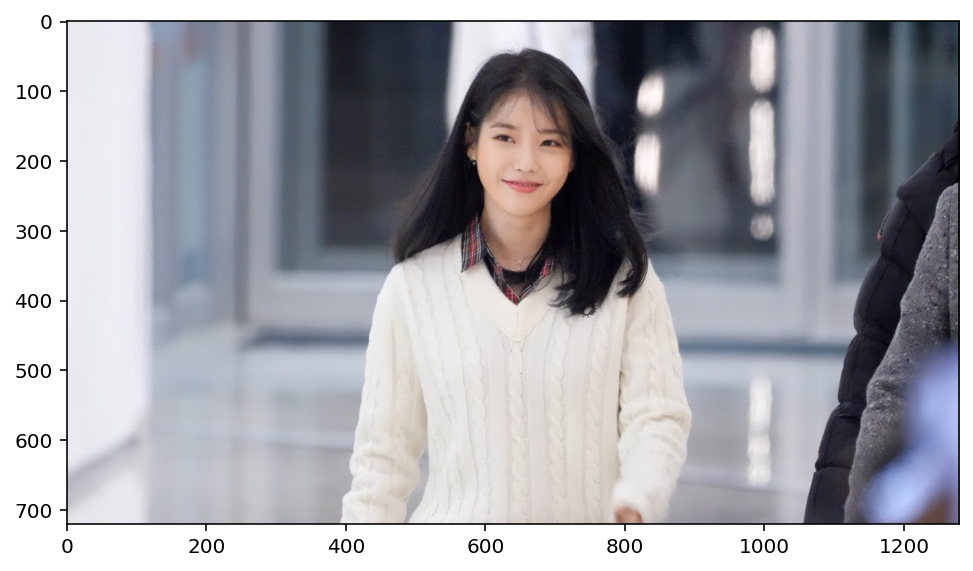

In [4]:
image = cv2.imread('../img/iu.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.show()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


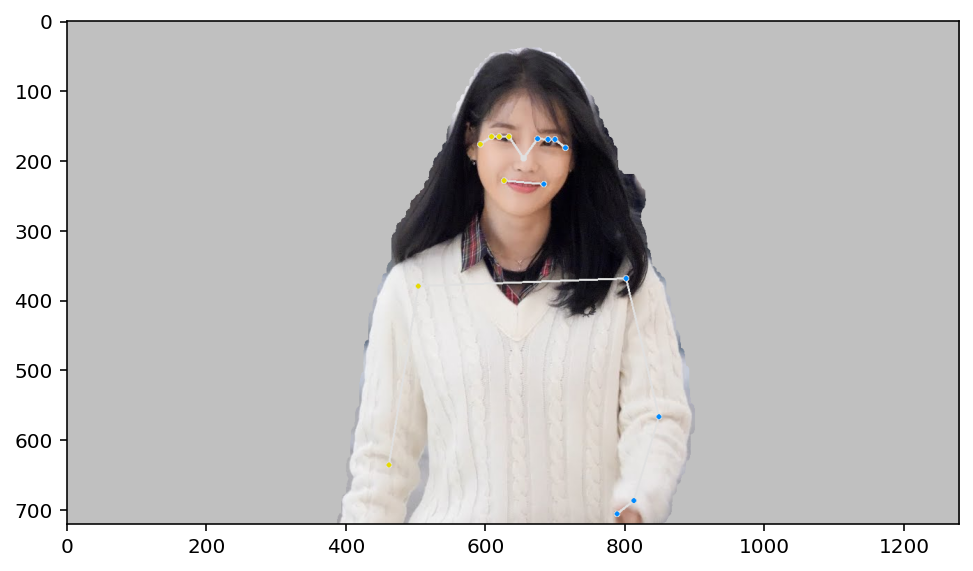

In [5]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5)
image_height, image_width, _ = image.shape
results = pose.process(image)
annotated_image = image.copy()
condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
bg_image = np.zeros(image.shape, dtype=np.uint8)
BG_COLOR = (192, 192, 192) # gray
bg_image[:] = BG_COLOR
annotated_image = np.where(condition, annotated_image, bg_image)
mp_drawing.draw_landmarks(
    annotated_image,
    results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
# Show
plt.figure(figsize=(8,8))
plt.imshow(annotated_image)
plt.show()